# Portfolio Optimization with Grover Adaptive Search

Let's consider a portfolio optimization where we want to find the optimal combination of three possible assets. The optimization problem is given by

$$
\min_x x^T Q x + \mu^T x
$$

with

$$
Q 
=
\begin{pmatrix}
1 & 0 & -2 \\
0 & 2 & -1 \\
-2 & -1 & 5
\end{pmatrix},~~
\mu = 
\begin{pmatrix}
-1 \\ 2 \\ -3
\end{pmatrix}
$$

In [1]:
import numpy as np

Q = np.array([
    [1, 0, -2],
    [0, 2, -1],
    [-2, -1, 5]
]) 
mu = np.array([-1, 2, -3])

We define a `QuadraticProgram` based on the above

In [2]:
from qiskit_optimization import QuadraticProgram

qp = QuadraticProgram()
_ = [qp.binary_var() for _ in range(3)]
qp.minimize(linear=mu, quadratic=Q)
print(qp)

minimize x0^2 - 4*x0*x2 + 2*x1^2 - 2*x1*x2 + 5*x2^2 - x0 + 2*x1 - 3*x2 (3 variables, 0 constraints, '')


and then use Qiskit Optimization's `GroverOptimizer` to optimize!

In [3]:
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import GroverOptimizer

num_value_qubits = 6  # number of qubits to represent the threshold and cost
num_iterations = 10  # number of times the solution has to stay the same
opt = GroverOptimizer(num_value_qubits, num_iterations=num_iterations, sampler=Sampler())

In [4]:
result = opt.solve(qp)

In [5]:
print(result)

fval=-2.0, x0=1.0, x1=0.0, x2=1.0, status=SUCCESS


Since this is a small instance we can manually verify the solution.

In [6]:
possible_states = [np.array([x1, x2, x3]) for x1 in range(2) for x2 in range(2) for x3 in range(2)]
values = [x.dot(Q.dot(x)) + mu.dot(x) for x in possible_states]

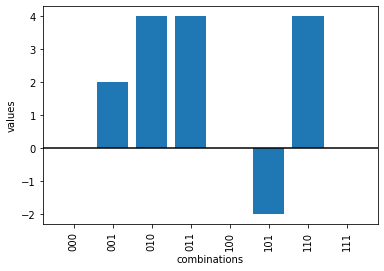

In [7]:
import matplotlib.pyplot as plt

labels = ["".join(map(str, x)) for x in possible_states]
plt.bar(np.arange(len(values)), values)
plt.xticks(np.arange(len(values)), labels, rotation=90)
plt.axhline(0, color="k")

plt.xlabel("combinations")
plt.ylabel("values")
plt.show()

Indeed, `101` is the combination with the minimal cost: the optimal portfolio combines assets 1 and 3!